# Argos Query Suggestions
This notebook scrapes the query suggestions from Argos.

In [1]:
import pandas as pd
import numpy as np

import requests
import json
from fake_useragent import UserAgent

import time
import warnings

import matplotlib.pyplot as plt
import seaborn

In [2]:
ua = UserAgent()
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36'}

### Loading list of toys
all_items.txt is a text file of different toys that will be queried.

In [3]:
with open('../predoc_info/all_items.txt') as f:
    contents = f.read().splitlines()

## Loading pre-documented gender stereotyped toys
predoc_sterotyped_items.csv is a csv file of the different toys and their pre documented assigned gender stereotypes

In [4]:
stereo_toys = pd.read_csv('../predoc_info/predoc_stereotyped_items.csv', delimiter =',')
stereo_toys

,BOY,GIRL,NEUTRAL
0,vehicle toys,doll,toy animals
1,sport,domestic toys,books
2,military toys,educational art,educational teaching
3,race cars,clothes,musical games
4,outer space toys,dollhouses,games
...,...,...,...
67,toy rocket,barbie furniture set,NaN
68,soccer ball,NaN,NaN
69,blue ipad,pink ipad,NaN
70,toy robots,NaN,NaN


### Dataset stats

In [5]:
boy_toys = stereo_toys['BOY'].dropna().unique().tolist()
girl_toys = stereo_toys['GIRL'].dropna().unique().tolist()
neutral_toys = stereo_toys['NEUTRAL'].dropna().unique().tolist()

print("stereotypical boy toys: ", len(boy_toys), 
      " stereotypical girl toys: ", len(girl_toys), 
      " stereotypically gender neutral toys: ", len(neutral_toys))

stereotypical boy toys:  71  stereotypical girl toys:  63  stereotypically gender neutral toys:  32


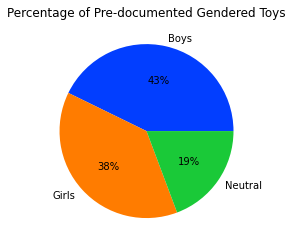

In [6]:
#visualize item gender distribution
data = [len(boy_toys), len(girl_toys), len(neutral_toys)]
keys = ['Boys', 'Girls', 'Neutral']
  
# define Seaborn color palette to use
palette_color = seaborn.color_palette('bright')
  
# plotting data on chart
plt.pie(data, labels=keys, colors=palette_color, autopct='%.0f%%')
  
# displaying chart
plt.title('Percentage of Pre-documented Gendered Toys')
plt.show()

This pie chart visualizes the percentage of toys assigned to genders. Boys have the highest percentage with girls being second and neutral the last.

## Preparing the data for query

### Adding "for"

In [7]:
search_terms = []
for x in contents:
    search_terms.append((x, x+' for'))
search_terms[:5]

[('vehicle toys', 'vehicle toys for'),
 ('sport', 'sport for'),
 ('military toys', 'military toys for'),
 ('race cars', 'race cars for'),
 ('outer space toys', 'outer space toys for')]

## Search Engines and E-Com Sites

### Defining scraping functions

In [8]:
def argos_scrape(query):
    url = f'https://www.argos.co.uk/suggest?term={query}%20f&fuzziness=true&size=5&includeFaq=true'
    response = requests.get(url, headers=headers, verify=False).json()
    return response

In [9]:
def argos_auto(item):
    res = argos_scrape(item)
    suggestions = res['autoSuggest']['keywords']
    results = []
    for s in suggestions:
        results.append(s['value'])
    return results

## Run queries

In [10]:
#create dataframe for results
columns = ['platform', 'item', 'suggestions']
df = pd.DataFrame(columns = columns)

#### Trial Run

In [11]:
#run below function with trial list of items before using contents
trial = search_terms[:5]

# trial run
warnings.filterwarnings('ignore')
platform = 'Argos'
trial_data = []
for item, q in trial:
    result = argos_auto(q)
    values = [platform, item, result]
    zipped = zip(columns, values)
    a_dictionary = dict(zipped)
    #print(a_dictionary)
    time.sleep(1.5)
    trial_data.append(a_dictionary)

In [12]:
trial_data

[{'platform': 'Argos', 'item': 'vehicle toys', 'suggestions': []},
 {'platform': 'Argos',
  'item': 'sport',
  'suggestions': ['all sports kit bundle for nintendo switch',
   'all sports kit bundle for',
   'sports for',
   'all sports kit for switch',
   'sports kit for nintendo switch']},
 {'platform': 'Argos', 'item': 'military toys', 'suggestions': []},
 {'platform': 'Argos', 'item': 'race cars', 'suggestions': []},
 {'platform': 'Argos', 'item': 'outer space toys', 'suggestions': []}]

#### Full Run

In [13]:
#once the trial run is successful run the code with all items
warnings.filterwarnings('ignore')
platform = 'Argos'
data = []
for item, q in search_terms:
    result = argos_auto(q)
    values = [platform, item, result]
    zipped = zip(columns, values)
    a_dictionary = dict(zipped)
    #print(a_dictionary)
    time.sleep(1.5)
    data.append(a_dictionary)

In [14]:
#look at data that has been extracted
data[0]

{'platform': 'Argos', 'item': 'vehicle toys', 'suggestions': []}

In [15]:
#put data into a dataframe with the platform, query, and scraped suggestions
df = df.append(data, True)
df

,platform,item,suggestions
0,Argos,vehicle toys,[]
1,Argos,sport,"[all sports kit bundle for nintendo switch, al..."
2,Argos,military toys,[]
3,Argos,race cars,[]
4,Argos,outer space toys,[]
...,...,...,...
161,Argos,scooter,"[scooter for adults, scooter for, lego icons v..."
162,Argos,drum set,[]
163,Argos,puzzles,[]
164,Argos,board games,"[board game for kids, family board game for ki..."


In [16]:
#export data to a csv file
df.to_csv('argos_query_suggestions.csv', index = False)